<a href="https://colab.research.google.com/github/molloyjb/ExploreGIT/blob/main/assignments/homework1/part2-starter-file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1, Part 2 Starter File
This file is not required, but can be used if you are having trouble installing necessary packages locally.

First, we will clone the repository from remote-sensing-hydro-2025, so we can use the necessary files. This might take a while.

In [1]:
!git clone https://github.com/rg-smith/remote-sensing-hydro-2025.git

Cloning into 'remote-sensing-hydro-2025'...
remote: Enumerating objects: 612, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 612 (delta 19), reused 6 (delta 6), pack-reused 586 (from 1)
Receiving objects: 100% (612/612), 103.26 MiB | 10.29 MiB/s, done.
Resolving deltas: 100% (292/292), done.
Updating files: 100% (645/645), done.


Now we will install the necessary packages. We will install one at a time

In [2]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 66.6 MB/s eta 0:00:00


In [3]:
!pip install rasterstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 12.2 MB/s eta 0:00:00


In [4]:
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import numpy as np
import pandas as pd

In [12]:
gdf = gpd.read_file("/content/remote-sensing-hydro-2025/data/watersheds/huc2-regional/huc2_reg_11.shp")
gdf = gdf.to_crs('OGC:CRS83')
shp = gdf
print(gdf.head())

  REG      SUM_AREA                                           geometry
0  11  6.421397e+11  POLYGON ((-106.35383 39.35471, -106.3522 39.35...


In [18]:
prism_years = np.arange(1950, 2024)
print(prism_years)

[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023]


In [16]:
precip_1yr = zonal_stats(shp,"/content/remote-sensing-hydro-2025/data/prism/PRISM_tmean_stable_4kmM3_1950_bil.bil")
precip_1yr_df = pd.DataFrame(precip_1yr)
precip_1yr_df.head()

,min,max,mean,count
0,-2.279,19.741001,14.079997,37029


In [108]:
raster_directory = "/content/remote-sensing-hydro-2025/data/prism"

def compute_zonal_stats(prism_year, shapefile, raster_dir):
    # Construct the path to the PRISM raster for the given year
    raster_path = f"{raster_dir}/PRISM_tmean_stable_4kmM3_{prism_year}_bil.bil"

    # Use rasterstats to compute zonal statistics
    stats = zonal_stats(shapefile, raster_path, stats="mean")  # You can modify the stats parameter as needed
    return stats

# Initialize an empty dictionary to store stats for each year
prism_stats_all = {}

# Iterate through each year and compute the zonal statistics
for prism_year in prism_years:
    #print(f"Processing data for year {prism_year}...")

    # Compute zonal stats for the given year
    annual_stats = compute_zonal_stats(prism_year, gdf, raster_directory)

    # Print the zonal statistics for the year
    #print(f"Zonal statistics for {prism_year}: {annual_stats}")

    # Store the results in the dictionary
    prism_stats_all[prism_year] = annual_stats[0]

    # Convert the stats to a DataFrame and store them in the dictionary
    prism_stats_df = pd.DataFrame(prism_stats_all).transpose()
    prism_stats_df.insert(0, "year", prism_years[:len(prism_stats_df)])

# If you'd like to inspect the results
# For example, check the stats for the first year
prism_stats_df.head()



,year,mean
1950,1950,14.079997
1951,1951,13.855844
1952,1952,14.682193
1953,1953,15.207332
1954,1954,15.861301


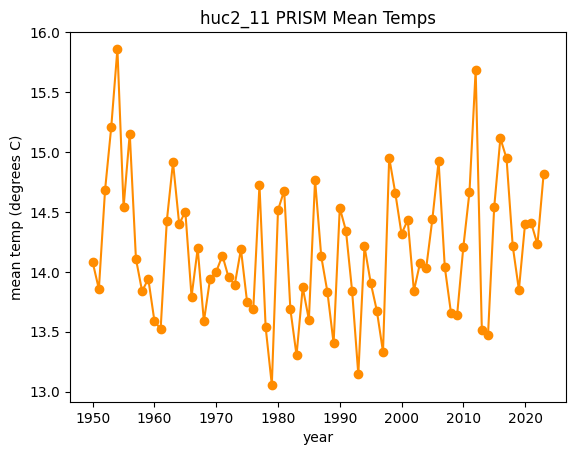

In [114]:
plt.plot(prism_stats_df['year'], prism_stats_df['mean'], linestyle='-', marker='o', color='darkorange')

plt.xlabel("year")
plt.ylabel("mean temp (degrees C)")
plt.title('huc2_11 PRISM Mean Temps')
plt.show()

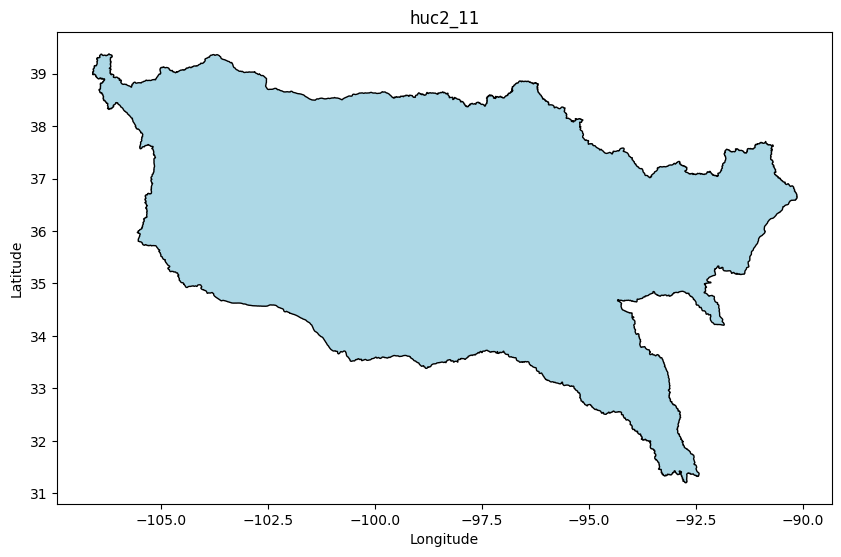

In [116]:
# Plot the shapefile geometries
gdf.plot(figsize=(10, 8), color='lightblue', edgecolor='black')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('huc2_11')
plt.show()

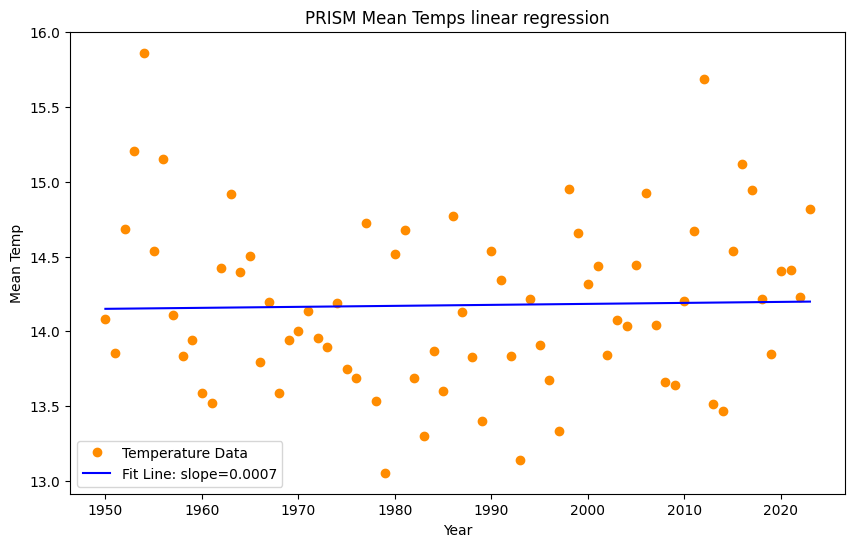

Slope-avg temp change: 0.0007, R-squared: 0.0006, P-value: 8.3154e-01


In [133]:
import scipy
from scipy import stats
from scipy.stats import linregress
x = prism_stats_df['year']
y = prism_stats_df['mean']

# Perform linear regression
slope, intercept, r, p, se = linregress(x, y)

# Generate regression line
regression_line = slope * x + intercept

# Plot the original data and the regression line
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='', label='Temperature Data', color='darkorange')
plt.plot(x, regression_line, label=f'Fit Line: slope={slope:.4f}', color='blue')

plt.xlabel("Year")
plt.ylabel("Mean Temp")
plt.title('PRISM Mean Temps linear regression')
plt.legend()
plt.show()

print(f"Slope-avg temp change: {slope:.4f}, R-squared: {r_value**2:.4f}, P-value: {p_value:.4e}")